# Use Convolutional Neural Network to Identify Spiral Arms
Project by Tiantian Yuan Dec 31, 2020

Motivation: my astrophysical research in the past three years focused on the origin of spiral arms.
Our solar system and the only home that we know about reside on a spiral arm of our Milky Way galaxy. 
My research looks back in time and capture spiral arms in their earliest stage of formation. 

How do we know if a galaxy has spiral arms?  The definition of spirals arms was unfortunately visual and subject to 
human being's perception.  I have always wondered about whether machine learning algorithms can help
us find and identify spiral galaxies among millions of astronomical images. 

Here is my first attempt of using CNN to achieve such a goal. 

For Data description, see group_data.ipynb.

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing
### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('dataset/training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 20797 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100, 100, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
from datetime import datetime
import time

In [14]:
t1 = time.time()
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)
t2 = time.time()
print('CNN running time is {:.2f}mins'.format((t2 - t1)/60))

Epoch 1/25
650/650 [==============================] - 278s 426ms/step - loss: 0.6477 - accuracy: 0.6088 - val_loss: 0.5638 - val_accuracy: 0.7056
Epoch 2/25
650/650 [==============================] - 169s 261ms/step - loss: 0.5744 - accuracy: 0.7001 - val_loss: 0.5545 - val_accuracy: 0.7141
Epoch 3/25
650/650 [==============================] - 176s 271ms/step - loss: 0.5561 - accuracy: 0.7152 - val_loss: 0.5597 - val_accuracy: 0.7127
Epoch 4/25
650/650 [==============================] - 176s 270ms/step - loss: 0.5394 - accuracy: 0.7216 - val_loss: 0.5207 - val_accuracy: 0.7403
Epoch 5/25
650/650 [==============================] - 179s 276ms/step - loss: 0.5215 - accuracy: 0.7424 - val_loss: 0.5240 - val_accuracy: 0.7413
Epoch 6/25
650/650 [==============================] - 175s 269ms/step - loss: 0.5063 - accuracy: 0.7465 - val_loss: 0.5093 - val_accuracy: 0.7483
Epoch 7/25
650/650 [==============================] - 178s 273ms/step - loss: 0.5018 - accuracy: 0.7513 - val_loss: 0.4935 -

## Part 4 - Testing the CNN's performance on new dataset
### We are going to have fun with 
1. A very well-known nearby large spiral galaxy with beautiful rgb color. 
2. A nearby spiral galaxy from a single-band color.
3. An ancient spiral galaxy (2.6 years after the Big Bang) that is gravitationally lensed.
4. A very distant 'cosmic ring of fire' galaxy

In [15]:
# check which label is which
training_set.class_indices

{'nonspirals': 0, 'spirals': 1}

In [16]:
from keras.preprocessing import image
def image_in(fileloc, dimx=100, dimy=100):
    """ reshape a raw jpg image into an array that is acceptable by keras models.
    Parameters
    ----------
    fileloc : path and name for the input image
        an input directory under which files are searched.
    dimx, dimy : int
        should be the same as the target_size in the trained CNN
    ----------
    Return
    test_image that can be processed by kera models 
    """
    test_image = image.load_img(fileloc, target_size = (dimx, dimy))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    return test_image

### Prediction 1. [successful on a higher-resolution color image]
This is a beautiful nearby spiral galaxy M101. The image is much large and has more details than the training set. 
Would CNN be able to recognise it as as spiral galaxy ?  Let's see.
<div>
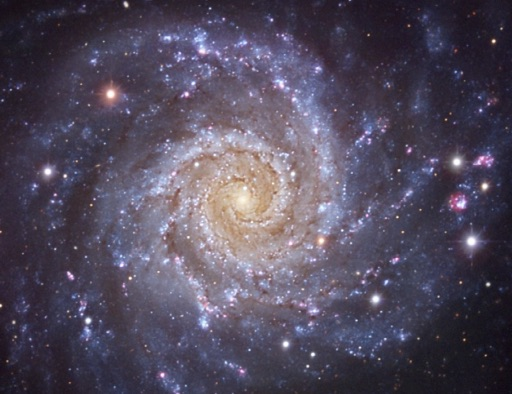
</div>


In [19]:
import numpy as np
fileloc = 'dataset/single_prediction_test/nearby_large.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

print('The predicted label is ', result)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

The predicted label is  [[1.]]
CNN predicts that the image above is  a spiral galaxy


### Prediction 2.  [failed on single-color image]
This is also a nearby spiral galaxy. The image is taken using only one filter,  i.e., a single color image.
Would CNN trained on 3-color images be able to recognise it as as spiral galaxy ?  Let's see.

<div>
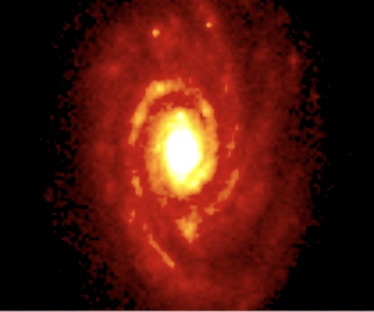
</div>


In [20]:
fileloc = 'dataset/single_prediction_test/spiral_singleband.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

print(result)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

[[0.]]
CNN predicts that the image above is  not a spiral galaxy


### Prediction 3.  [Successful on a gravitationally lensed distant spiral]

This is an ancient spiral galaxy that I studied. Would the CNN trained using 
nearby spiral galaxies be able to identify such a proto-type spiral galaxy ? 
https://en.wikipedia.org/wiki/A1689B11

<div>
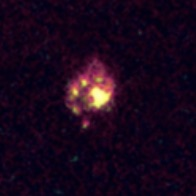
</div>


In [21]:
fileloc = 'dataset/single_prediction_test/ancient_spiral_A1689B11.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

print(result)

if result[0][0] == 1:
    prediction = 'spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

[[1.]]
CNN predicts that the image above is  spiral galaxy


### Prediction 4:  What about a weird type ? Spiral or non-Spiral ?
This is the cosmic 'ring of fire' galaxy that I discovered. 
https://astronomycommunity.nature.com/posts/a-distant-giant-with-a-ring-on-it

Would the CNN trained using nearby spiral galaxies classify such a ring galaxy as 'spiral' or 'nonspiral'?  I am curious.  Let's see! 
<div>
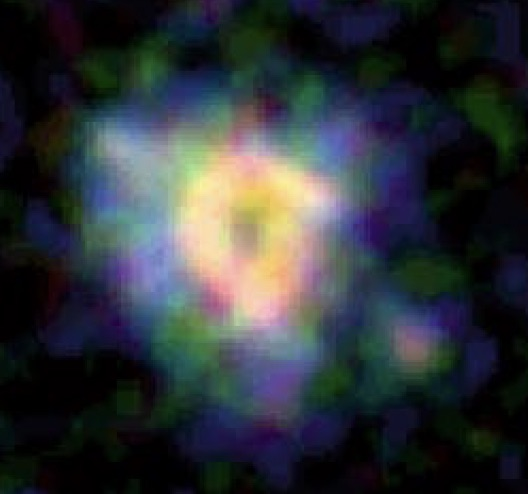
</div>



In [1]:
fileloc = 'dataset/single_prediction_test/cosmic_ring_of_fire.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

if result[0][0] == 1:
    prediction = 'spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

NameError: name 'image_in' is not defined